Background: Enterococcus is a fecal indicating bacteria that lives in the intestines of humans and other warm-blooded animals. Enterococcus (“ Entero”) counts are useful as a water quality indicator due to their abundance in human sewage, correlation with many human pathogens and low abundance in sewage free environments. The United States Environmental Protection Agency (EPA) reports Entero counts as colonies (or cells) per 100 ml of water.

Riverkeeper has based its assessment of acceptable water quality on the 2012 Federal Recreational Water Quality Criteria from the US EPA. Unacceptable water is based on an illness rate of 32 per 1000 swimmers. The federal standard for unacceptable water quality is a single sample value of greater than 110 Enterococcus/100 mL, or five or more samples with a geometric mean (a weighted average) greater than 30 Enterococcus/100 mL.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
from IPython.display import display
import time
import re

In [22]:
#Explore the datasets
df = pd.read_csv("https://raw.githubusercontent.com/blin261/608/master/riverkeeper_data_2013.csv")
display(df.head(20))
df.dtypes

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35
5,Hudson above Mohawk River,6/4/2013,238,1.2,35
6,Hudson above Mohawk River,10/15/2012,23,1.4,35
7,Hudson above Mohawk River,9/15/2012,11,0.1,35
8,Hudson above Mohawk River,8/18/2012,15,0.3,35
9,Hudson above Mohawk River,7/21/2012,6,0.2,35


Site                 object
Date                 object
EnteroCount          object
FourDayRainTotal    float64
SampleCount           int64
dtype: object

In [23]:
#Remove non-numeric characters and convert data type for analysis.
df["EnteroCount"] = df["EnteroCount"].str.lstrip("<>")
df["EnteroCount"] = pd.to_numeric(df["EnteroCount"], errors = "coerce")
df["Date"] = pd.to_datetime(df["Date"], errors = "coerce")
df.dropna(how = "any")
display(df.head(20))
df.dtypes

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,2011-10-16,1733,1.5,35
1,Hudson above Mohawk River,2013-10-21,4,0.2,35
2,Hudson above Mohawk River,2013-09-21,20,0.0,35
3,Hudson above Mohawk River,2013-08-19,6,0.0,35
4,Hudson above Mohawk River,2013-07-21,31,0.0,35
5,Hudson above Mohawk River,2013-06-04,238,1.2,35
6,Hudson above Mohawk River,2012-10-15,23,1.4,35
7,Hudson above Mohawk River,2012-09-15,11,0.1,35
8,Hudson above Mohawk River,2012-08-18,15,0.3,35
9,Hudson above Mohawk River,2012-07-21,6,0.2,35


Site                        object
Date                datetime64[ns]
EnteroCount                  int64
FourDayRainTotal           float64
SampleCount                  int64
dtype: object

Create lists & graphs of the best and worst places to swim in the dataset.

In [24]:
#Summarize the statistic parameters for each site
df.groupby("Site").describe()

EnteroCount  FourDayRainTotal  SampleCount
Site                                                                    
125th St. Pier         count    66.000000         66.000000         66.0
                       mean    179.696970          0.771212         66.0
                       std     350.559332          1.174965          0.0
                       min       8.000000          0.000000         66.0
                       25%      12.750000          0.000000         66.0
                       50%      43.500000          0.400000         66.0
                       75%     135.750000          1.000000         66.0
                       max    1500.000000          6.400000         66.0
79th St. mid-channel   count    49.000000         49.000000         49.0
                       mean     47.204082          0.861224         49.0
                       std     149.335888          1.551990          0.0
                       min       1.000000          0.000000         49.0
                       25%      10.000000          0.000000         49.0
                       50%      10.000000          0.400000         49.0
                       75%      20.000000          1.000000         49.0
                       max    1032.000000          8.500000         49.0
Albany Rowing Dock     count    36.000000         36.000000         36.0
                       mean    280.944444          0.630556         36.0
                       std     598.010891          0.744818          0.0
                       min       3.000000          0.000000         36.0
                       25%      24.250000          0.075000         36.0
                       50%      48.000000          0.250000         36.0
                       75%     140.000000          1.325000         36.0
                       max    2420.000000          2.800000         36.0
Annesville Creek       count    38.000000         38.000000         38.0
                       mean     83.421053          0.484211         38.0
                       std     192.784102          0.730245          0.0
                       min       5.000000          0.000000         38.0
                       25%      10.000000          0.000000         38.0
                       50%      10.000000          0.100000         38.0
...                                   ...               ...          ...
Wappingers Creek       std      70.800026          0.468647          0.0
                       min       1.000000          0.000000         35.0
                       25%       4.000000          0.000000         35.0
                       50%       9.000000          0.100000         35.0
                       75%      19.500000          0.450000         35.0
                       max     411.000000          2.100000         35.0
West Point STP Outfall count    36.000000         36.000000         36.0
                       mean     91.194444          0.280556         36.0
                       std     402.869835          0.421439          0.0
                       min       1.000000          0.000000         36.0
                       25%       4.000000          0.000000         36.0
                       50%       7.000000          0.100000         36.0
                       75%      16.750000          0.425000         36.0
                       max    2420.000000          2.100000         36.0
Yonkers STP Outfall    count    51.000000         51.000000         51.0
                       mean     66.960784          0.737255         51.0
                       std     333.805270          1.548155          0.0
                       min       3.000000          0.000000         51.0
                       25%      10.000000          0.000000         51.0
                       50%      10.000000          0.200000         51.0
                       75%      21.000000          0.700000         51.0
                       max    2400.000000          8.500000         51.0
Yonkers mid-cha

In [25]:
#list top 10 best place to swim.
rank = df.groupby("Site")["EnteroCount"].mean().sort_values()
rank[0:9]

Site
Poughkeepsie Drinking Water Intake     8.342105
Croton Point Beach                    15.458333
Stony Point mid-channel               17.340909
Little Stony Point                    17.526316
Poughkeepsie Launch Ramp              17.675676
Haverstraw Bay mid-channel            18.708333
TZ Bridge mid-channel                 21.438596
Cold Spring Harbor                    22.542857
Yonkers mid-channel                   25.019231
Name: EnteroCount, dtype: float64

Best PLaces to Swim


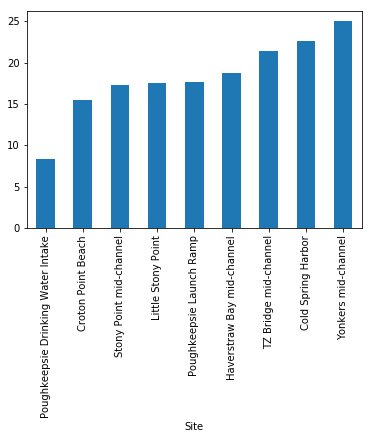

In [26]:
print("Best PLaces to Swim")
rank[0:9].plot.bar()
plt.show()

In [27]:
#List the top 10 worst place to swim.
rank[-10:][::-1]

Site
Gowanus Canal                              4206.837838
Newtown Creek- Metropolitan Ave. Bridge    2953.684211
Tarrytown Marina                           2205.666667
Saw Mill River                             1455.760000
Upper Sparkill Creek                       1296.072727
Newtown Creek- Dutch Kills                 1205.087719
Kingsland Pt. Park- Pocantico River         907.857143
Orangetown STP Outfall                      854.192982
Mohawk River at Waterford                   621.057143
Piermont Pier                               482.165775
Name: EnteroCount, dtype: float64

Worst PLaces to Swim


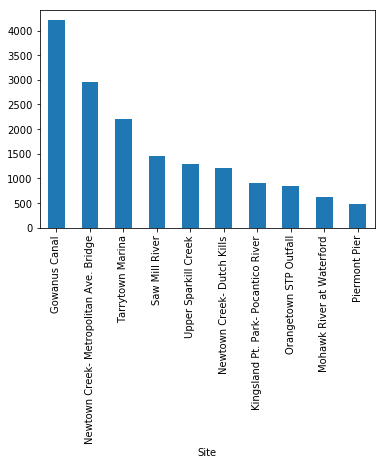

In [28]:
print("Worst PLaces to Swim")
rank[-10:][::-1].plot.bar()
plt.show()

The testing of water quality can be sporadic. Which sites have been tested most regularly?
Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how
regularly their water quality is tested.

In [29]:
#Sort the data frame based on date variable. Then calculate the days between each testing. Lastly, calculate the average
#number of days to have the testing completed.  
df1 = df.sort_values(by = 'Date')
df1 = df1.groupby("Site")["Date"].apply(lambda x: x.diff().mean())

In [30]:
display(df1.head(20))
df1.dtypes

Site
125th St. Pier                 39 days 13:17:32.307692
79th St. mid-channel                  53 days 16:30:00
Albany Rowing Dock             56 days 12:20:34.285714
Annesville Creek               53 days 09:43:47.027027
Athens                         57 days 09:10:35.294117
Beacon Harbor                  53 days 09:43:47.027027
Bethlehem Launch Ramp          56 days 12:20:34.285714
Castle Point, NJ                      52 days 00:00:00
Castleton                      57 days 08:28:14.117647
Catskill Creek- East End       48 days 05:16:05.853658
Catskill Creek- First Bridge   53 days 10:22:42.162162
Catskill Launch Ramp                  54 days 22:00:00
Cedar Pond Brook               55 days 12:31:18.260869
Coeymans Landing               56 days 12:20:34.285714
Cold Spring Harbor             57 days 07:45:52.941176
Congress St. Bridge- Troy      53 days 11:01:37.297297
Coxsackie Waterfront Park      57 days 09:10:35.294117
Croton Point Beach                    55 days 00:00:00
Dunn 

dtype('<m8[ns]')

In [31]:
time_gap = df1.astype('timedelta64[D]').sort_values()
time_gap.dtypes
display(time_gap.head(10))

Site
Upper Sparkill Creek                       13.0
Piermont Pier                              13.0
Nyack Launch Ramp                          32.0
125th St. Pier                             39.0
Rondout- Eddyville Anchorage               44.0
TZ Bridge mid-channel                      46.0
Orangetown STP Outfall                     46.0
Newtown Creek- Metropolitan Ave. Bridge    46.0
Newtown Creek- Dutch Kills                 46.0
Kingsland Pt. Park- Pocantico River        46.0
Name: Date, dtype: float64

Sites Tested Most Regularly


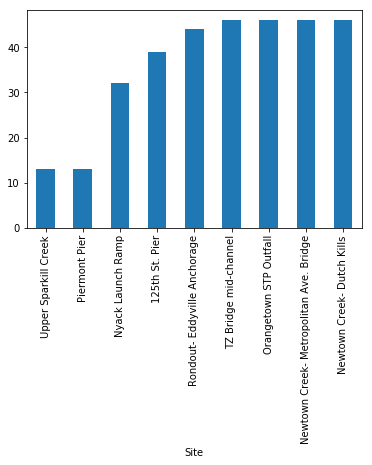

In [32]:
#Plot the top 10 sites which are tested most frequently.
print("Sites Tested Most Regularly")
time_gap[0:9].plot.bar()
plt.show()

Sites Tested Least Regularly


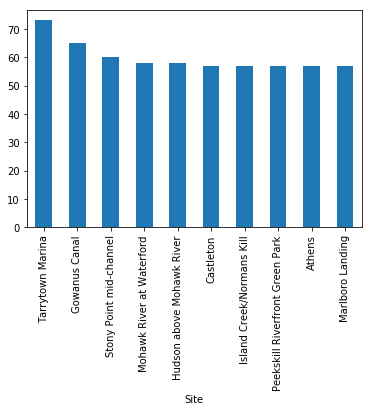

In [34]:
#Plot the top 10 sites which are tested least frequently.
print("Sites Tested Least Regularly")
time_gap[-10:][::-1].plot.bar()
plt.show()

Is there a relationship between the amount of rain and water quality? Show this
relationship graphically. If you can, estimate the effect of rain on quality at different sites and
create a visualization to compare them.

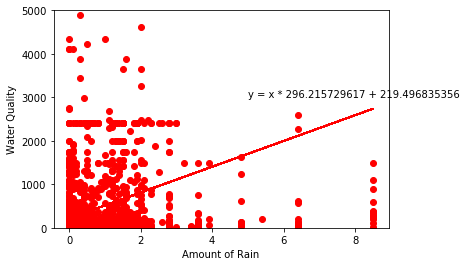

In [35]:
x = np.array(df["FourDayRainTotal"].dropna(how = "any"))
y = np.array(df["EnteroCount"].dropna(how = "any"))

plt.scatter(x, y, color = 'red')
plt.xlabel('Amount of Rain')
plt.ylabel("Water Quality")
m, b = np.polyfit(x, y, deg = 1)
plt.plot(x, m * x + b, color = "red")
plt.ylim(0, 5000)
plt.text(5, 3000, "y = x * %s + %s" % (m, b), size=10)
plt.show()